In [1]:
import TXOsim.helpers.sbmlIO as sio
import tellurium as te
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
PATH_TO_MODELS = "./TXOsim/models/"
PATH_TO_OUTPUT = "./TXOsim/output/" # Path for output data, plots
MODELNAME = "michaelis"
MODELPY = "michaelis.py"
FILENAME = "michaelis.csv" # Filename for output data

In [3]:
# Generate ODEs from antimony file
r = te.loada(PATH_TO_MODELS+MODELNAME)
odes = sio.getODEsFromModel(r)
speciesIds, speciesValues, parameterIds, parameterValues, derivatives = sio.parseODEs(r,odes)
sio.writePython(speciesIds,speciesValues,parameterIds,parameterValues,derivatives,PATH_TO_MODELS,MODELPY)
print(odes)


v_J0 = k1*S*E
v_J1 = k2*ES
v_J2 = k3*ES

dS/dt = -v_J0 + v_J1
dE/dt = -v_J0 + v_J1 + v_J2
dP/dt = v_J2
dES/dt = v_J0 - v_J1 - v_J2



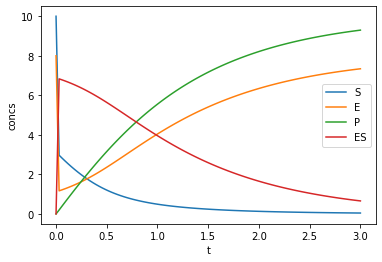

In [4]:
# Solve ODEs 
from TXOsim.models import michaelis
y0 = np.array([float(value) for value in speciesValues])
params = np.array([float(value) for value in parameterValues])
TMAX = 3
NSTEPS = 100

time = np.linspace(0,TMAX,NSTEPS)
sol = odeint(michaelis.model, y0, time, args=(params,)) # Scipy solver

# Plot and save plot
for i in range(sol.shape[1]):
    plt.plot(time,sol[:,i], label=speciesIds[i]);
plt.xlabel('t'); plt.ylabel('concs'); plt.legend()   
plt.savefig(PATH_TO_OUTPUT+'plot.pdf',transparent=True)
plt.show() 

# Save data
df = pd.DataFrame(sol)
df.to_csv(PATH_TO_OUTPUT+FILENAME, index=None)